# GNSS Reflection Geometry and SNR Simulation
This Jupyter Notebook demonstrates how to simulate GNSS (Global Navigation Satellite System) reflection geometry and SNR (Signal-to-Noise Ratio) data using Python. We will generate an animated GIF that visualizes the relationship between the elevation angle of the satellite, the height of the antenna, and the resulting SNR

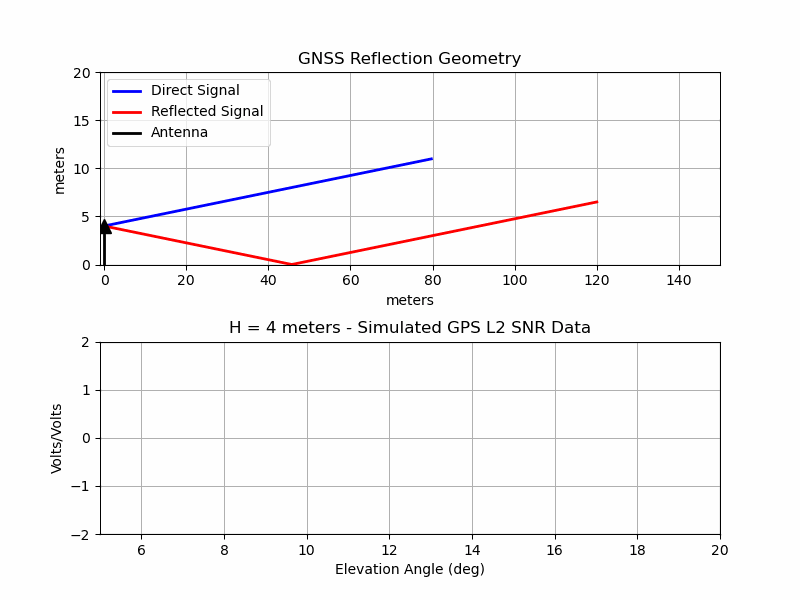

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image, display

# Constants
FS = 12
emin = 5
emax = 20
E = np.arange(emin, emax, 0.05)
Am = 1
attenuator = True

# Function to simulate the SNR and plot parameters
def set_Frame(height, E, Am, atten):
    wavelength = 0.244  # GPS L2 wavelength

    # Path delay (difference in path length between direct and reflected signals)
    path_del = 2 * height * np.sin(np.radians(E))
    psihat = 2 * np.pi * path_del / wavelength  # phase shift in radians

    # Simple attenuation
    if atten:
        Am = 5 * Am / E

    # Definition of SNR data
    SNR = Am * (np.cos(psihat) + np.sin(psihat))

    # Geometric values for the plot
    Xaxis = np.ceil(height / np.tan(np.radians(5)))
    Yaxis = 0.33 * Xaxis
    startX = 30 * height
    bigNumber = 20 * height
    
    return startX, bigNumber, Xaxis, Yaxis, SNR

# Setup figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
plt.subplots_adjust(hspace=0.4)

# Initialize plot elements we will update during the animation
line1, = ax1.plot([], [], 'b-', linewidth=2)
line2, = ax1.plot([], [], 'r-', linewidth=2)
line3, = ax1.plot([], [], 'k-', linewidth=2)
antenna, = ax1.plot([], [], 'k^', markerfacecolor='k', markersize=10)
snr_line, = ax2.plot([], [], 'k-')

# Axes setup
ax1.set_xlim(-1, 150)
ax1.set_ylim(0, 20)
ax1.set_xlabel('meters')
ax1.set_ylabel('meters')
ax1.set_title('GNSS Reflection Geometry', fontweight='normal')
ax1.grid(True)
ax1.legend(['Direct Signal', 'Reflected Signal', 'Antenna'], loc='upper left')

ax2.set_xlim(emin, emax)
ax2.set_ylim(-2, 2)
ax2.set_xlabel('Elevation Angle (deg)')
ax2.set_ylabel('Volts/Volts')
ax2.grid(True)

# Animation function
def animate(i):
    # Determine current height based on the frame number
    current_height = height_list[i // frames_per_height]
    
    # Calculate the index within the current height's frames
    index = (i % frames_per_height) * incr
    if index >= len(E):
        return

    startX, bigNumber, Xaxis, Yaxis, SNR = set_Frame(current_height, E, Am, attenuator)
    k = np.arange(0, index)
    Xd = current_height / np.tan(np.radians(E[index]))
    X3 = startX - Xd

    # Update line data
    line1.set_data([0, bigNumber * np.cos(np.radians(E[index]))],
                   [current_height, current_height + bigNumber * np.sin(np.radians(E[index]))])
    line2.set_data([startX, Xd, 0], [X3 * np.tan(np.radians(E[index])), 0, current_height])
    line3.set_data([0, 0], [0, current_height])
    antenna.set_data([0], [current_height])

    snr_line.set_data(E[k], SNR[k])
    ax2.set_title(f'H = {current_height} meters - Simulated GPS L2 SNR Data', fontweight='normal')

# Parameters for the animation
incr = 10
height_list = [4, 10]  # Heights to simulate
frames_per_height = len(E) // incr
numframes = frames_per_height * len(height_list)

# Create the animation
ani = FuncAnimation(fig, animate, frames=numframes, repeat=False, blit=False)

# Save the animation as a GIF
writer = PillowWriter(fps=10)
ani.save('myAnimation.gif', writer=writer)

# Close the figure to prevent additional output
plt.close(fig)

# Display the generated GIF inline
display(Image(filename='myAnimation.gif'))
